In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

# 데이터 준비

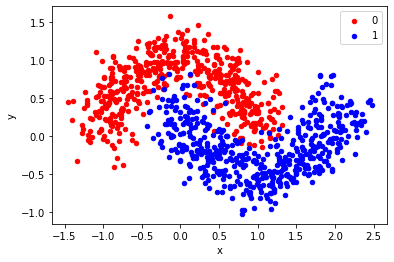

In [9]:
from sklearn.datasets import make_moons


# 데이터 생성
x, y = make_moons(n_samples=1000, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 공통 실행 함수


=========================== 1th K-Fold ==============================



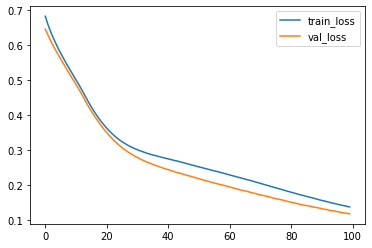

7/7 [==============================] - 0s 3ms/step - loss: 0.1294 - acc: 0.9500
loss= 0.12935589253902435
acc= 0.949999988079071
[[92  6]
 [ 4 98]]


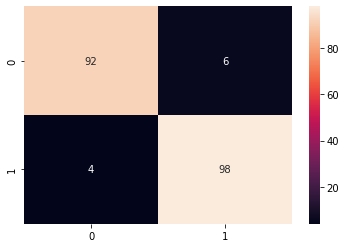

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200


=========================== 2th K-Fold ==============================



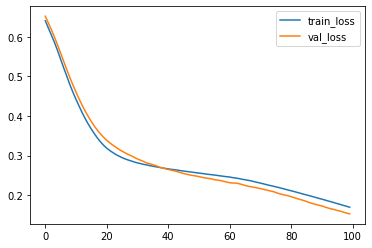

7/7 [==============================] - 0s 3ms/step - loss: 0.1961 - acc: 0.9200
loss= 0.19608217477798462
acc= 0.9200000166893005
[[87  5]
 [11 97]]


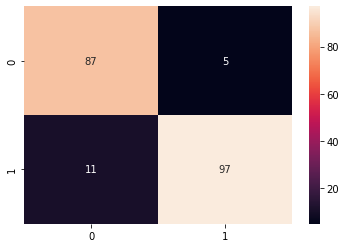

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        92
           1       0.95      0.90      0.92       108

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200


=========================== 3th K-Fold ==============================



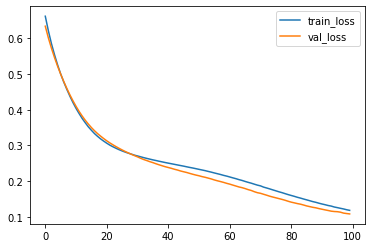

7/7 [==============================] - 0s 3ms/step - loss: 0.1414 - acc: 0.9400
loss= 0.14140665531158447
acc= 0.9399999976158142
[[ 86   7]
 [  5 102]]


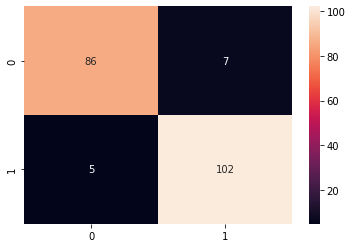

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        93
           1       0.94      0.95      0.94       107

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200


=========================== 4th K-Fold ==============================



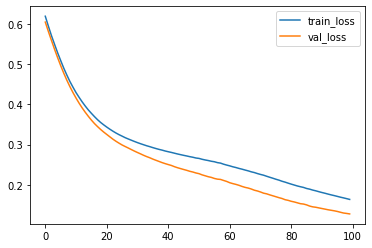

7/7 [==============================] - 0s 3ms/step - loss: 0.1518 - acc: 0.9400
loss= 0.15175916254520416
acc= 0.9399999976158142
[[103   4]
 [  8  85]]


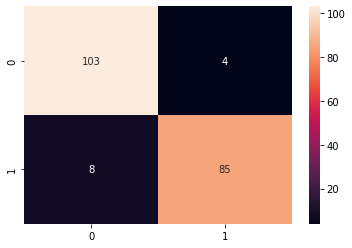

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       107
           1       0.96      0.91      0.93        93

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200


=========================== 5th K-Fold ==============================



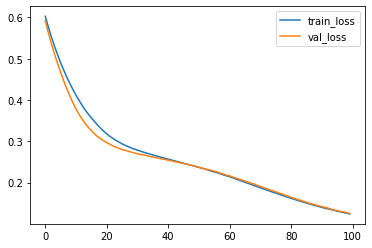

7/7 [==============================] - 0s 3ms/step - loss: 0.1035 - acc: 0.9600
loss= 0.10345134884119034
acc= 0.9599999785423279
[[108   2]
 [  6  84]]


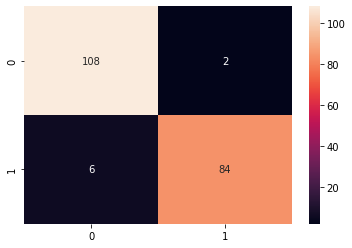

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       110
           1       0.98      0.93      0.95        90

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200


=========================== Aggregated ==============================

[[476  24]
 [ 34 466]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       500
           1       0.95      0.93      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



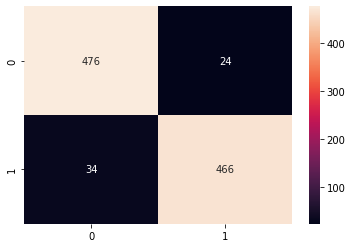

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

all_test_y = []
all_predicted = []

i = 1
for train_index, test_index in KFold(n_splits=5).split(x, y):
    print()
    print(f"=========================== {i}th K-Fold ==============================")
    print()
    i += 1

    train_x, test_x = x[train_index], x[test_index]
    train_y, test_y = y[train_index], y[test_index]

    model = Sequential()
    model.add(Input(2))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

    base_history = model.fit(train_x, train_y, epochs=100, batch_size=128, verbose=0, validation_split=0.2)


    plt.plot(base_history.history['loss'], label='train_loss')
    plt.plot(base_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    loss, acc = model.evaluate(test_x, test_y)
    print("loss=", loss)
    print("acc=", acc)


    y_ = model.predict(test_x)
    predicted = np.argmax(y_, axis=-1)

    cm = confusion_matrix(test_y, predicted)
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()

    print(classification_report(test_y, predicted))
    all_test_y.extend(test_y)
    all_predicted.extend(predicted)


print()
print(f"=========================== Aggregated ==============================")
print()

cm = confusion_matrix(all_test_y, all_predicted)
print(cm)
plt.show()
sns.heatmap(cm, annot=True, fmt="d")

print(classification_report(all_test_y, all_predicted))
    